## 1. Standard Imports

In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import torch
import torch.nn as nn
import numpy as np

# for printing out status reports
import sys

# for data visualization
import matplotlib.pyplot as plt

## 2. Create temporal Sequences

In [3]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

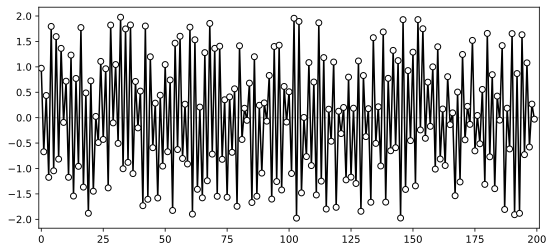

In [4]:
# Creating the alternating sequences of +ve and -ve numbers.
N = 200

data = torch.zeros(N)

for i in range(N):
    data[i] = 2*torch.rand(1) * (-1)**i

plt.figure(figsize=(9,4), dpi=135)

plt.plot([-2,N+1],[0,0],'--', color=[.8,.8,.8])
plt.plot(data,'ko-',markerfacecolor='w')
plt.xlim([-1,N+1])

plt.show()

## 3. Explore the LSTM type

In [5]:
# check out the source code for more detailed info about this class
# ??nn.LSTM

## 4. Custom LSTM function

#### Parameters of LSTM : 

- **input_size** :    Number of data-input channel or features.
- **hidden_size** :   Number of neurons per hidden layer
- **num_layers** :    Number of hidden layers stacked on top of each other.
- **bias** :          Boolean value, represents whether to include the bias term.

In [6]:
def get_LSTM_object(InputSize, HiddenSize, NumLayers=1, Bias_boolean=True ):
    
    lstm = nn.LSTM(input_size=InputSize,
                   hidden_size=HiddenSize,
                   num_layers=NumLayers,
                   bias=Bias_boolean
                  )
    
    return lstm

In [7]:
inputSize =  9
hiddensize = 16
numLayers = 2

lstm = get_LSTM_object(InputSize=inputSize,
                       HiddenSize=hiddensize,
                       NumLayers=numLayers,
                     )

In [8]:
lstm

LSTM(9, 16, num_layers=2)

#### Testing with some data

In [9]:
# set data parameters
seqlength = 5
batchsize = 2

# create some data
X = torch.rand(seqlength,batchsize,inputSize)

# create a hidden state
hiddenstate = torch.zeros(numLayers, batchsize, hiddensize)
cellstate =   torch.zeros(numLayers, batchsize, hiddensize)

In [10]:
X

tensor([[[0.2675, 0.2547, 0.1184, 0.6547, 0.3710, 0.8648, 0.0634, 0.1099,
          0.9406],
         [0.9701, 0.4761, 0.8545, 0.0920, 0.0745, 0.9386, 0.0646, 0.4650,
          0.8956]],

        [[0.0646, 0.9432, 0.0845, 0.7310, 0.5997, 0.8421, 0.9122, 0.1377,
          0.1246],
         [0.1890, 0.5971, 0.2233, 0.2377, 0.8085, 0.1910, 0.8699, 0.2248,
          0.9037]],

        [[0.4010, 0.1219, 0.5175, 0.5772, 0.5014, 0.0342, 0.2890, 0.2267,
          0.4777],
         [0.6934, 0.0628, 0.5720, 0.0836, 0.0451, 0.7983, 0.2753, 0.7094,
          0.0060]],

        [[0.0507, 0.4307, 0.9385, 0.5638, 0.1911, 0.1752, 0.3726, 0.8949,
          0.3128],
         [0.8260, 0.4519, 0.1596, 0.3322, 0.8831, 0.0220, 0.2379, 0.3552,
          0.2471]],

        [[0.6842, 0.3457, 0.0799, 0.9721, 0.5204, 0.9705, 0.0625, 0.1907,
          0.8067],
         [0.9965, 0.5821, 0.6740, 0.3859, 0.5476, 0.4242, 0.0130, 0.8072,
          0.8640]]])

In [11]:
X.shape

torch.Size([5, 2, 9])

#### Pytorch Applies a linear transformation to the incoming data: 
- 𝑦 = xW^𝑇 + 𝑏


In [12]:
# run some data through the model and show the output sizes

# the input is actually a tuple of (hiddenstate & cellstate)
hiddeninputs = (hiddenstate, cellstate)

# hiddensize, cellstate 

y, state = lstm(X,hiddeninputs)

print(f' Input shape : {list(X.shape)}')
print(f'Hidden State shape : {list(state[0].shape)}')
print(f'Cell State shape : {list(state[1].shape)}')
print(f'Output shape : {list(y.shape)}')

 Input shape : [5, 2, 9]
Hidden State shape : [2, 2, 16]
Cell State shape : [2, 2, 16]
Output shape : [5, 2, 16]


In [13]:
y

tensor([[[-1.1563e-02, -2.6946e-02,  2.8089e-02,  8.4377e-02,  1.0401e-02,
          -1.8109e-02, -1.0650e-03, -3.6571e-02, -4.8612e-02,  7.1821e-02,
           6.4913e-02, -6.1786e-02, -1.1433e-01, -3.0744e-02, -2.5659e-02,
          -6.3452e-02],
         [-1.9605e-02, -2.4698e-02,  2.8654e-02,  8.5180e-02,  1.2338e-02,
          -1.3589e-02, -3.0894e-03, -3.4373e-02, -4.6060e-02,  7.2044e-02,
           5.7595e-02, -5.6989e-02, -1.2433e-01, -2.9037e-02, -1.6488e-02,
          -7.6674e-02]],

        [[-2.7246e-02, -5.0050e-02,  3.8129e-02,  1.3897e-01,  2.9618e-02,
          -3.7252e-02,  1.2870e-03, -6.3520e-02, -7.4913e-02,  1.1514e-01,
           8.6536e-02, -8.4263e-02, -1.6596e-01, -5.0586e-02, -2.6728e-02,
          -7.9553e-02],
         [-4.2511e-02, -4.4313e-02,  3.3698e-02,  1.3969e-01,  2.8057e-02,
          -3.5764e-02, -3.2255e-03, -6.0930e-02, -7.0409e-02,  1.1302e-01,
           8.4605e-02, -7.0793e-02, -1.8131e-01, -4.4479e-02, -1.7178e-02,
          -9.7344e-02]],



In [14]:
for p in lstm.named_parameters():
    
    print(f"{p[0]} size : {list(p[1].shape)}" )
    print()
    #print(list(p[1].shape))
    
# i_t : input gate, f_t : forget gate, g_t : cell gate, o_t : output gate
# weight_ih_l[k] : learnable input-hidden weights of the kth layer of shape 
#                  (4*hidden_size, input_size)
#                  4 : w_ii, w_if, w_ig, w_io


# weight_hh_l[k] : learnable hidden-hidden weights of the kth layer of shape 
#                  (4*hidden_size, hidden_size). 
#                  4 : w_hi, w_hf, w_hg, w_ho

weight_ih_l0 size : [64, 9]

weight_hh_l0 size : [64, 16]

bias_ih_l0 size : [64]

bias_hh_l0 size : [64]

weight_ih_l1 size : [64, 16]

weight_hh_l1 size : [64, 16]

bias_ih_l1 size : [64]

bias_hh_l1 size : [64]



## 5. Custom LSTM class

In [16]:
class LSTMnet(nn.Module):
    
    def __init__(self, inputSize, hiddenSize, numLayers=1, batchSize=1, Print=False):
        super().__init__()

        # store parameters
        self.input_size = inputSize
        self.hidden_size = hiddenSize
        self.num_layers = numLayers
        self.batch_size = batchSize
        self.print = Print

        # RNN Layer
        self.lstm = nn.LSTM(inputSize, hiddenSize, numLayers)

        # Linear layer for output
        self.out = nn.Linear(hiddenSize, 1)
  
    def forward(self,x):
    
        if self.print : print(f'Input: {list(x.shape)}')
    
        # initialize hidden and cell state for first input
        hiddenstate = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        cellstate = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        if self.print: print(f'HiddenState Before: {list(hiddenstate.shape)}')
        if self.print : print(f"Cellstate Before : {list(cellstate.shape)}")
        
        state = (hiddenstate, cellstate)
        
        # run through the RNN layer
        y,lstmstate = self.lstm(x,state)
        if self.print:print(f'LSTM-out: {list(y.shape)}')
        
        if self.print: print(f'LSTM hiddenstate After: {list(lstmstate[0].shape)}')
        if self.print: print(f'LSTM cellstate After: {list(lstmstate[1].shape)}')
    
        # pass the RNN output through the linear output layer
        o = self.out(y)
        if self.print: print(f'Output: {list(o.shape)}')

        return o, lstmstate

In [17]:
# create an instance of the model and inspect
net = LSTMnet(inputSize=9, hiddenSize=16, numLayers=1, batchSize=2, Print=True)
print(net), print(' ')

# check out all learnable parameters
for p in net.named_parameters():
    print(f'{p[0]} has size {list(p[1].shape)}')

LSTMnet(
  (lstm): LSTM(9, 16)
  (out): Linear(in_features=16, out_features=1, bias=True)
)
 
lstm.weight_ih_l0 has size [64, 9]
lstm.weight_hh_l0 has size [64, 16]
lstm.bias_ih_l0 has size [64]
lstm.bias_hh_l0 has size [64]
out.weight has size [1, 16]
out.bias has size [1]


### Test the model with some data

In [18]:
# create some data
seqlen = 5
batchSize=2
inputSize=9

X = torch.rand(seqlen, batchSize, inputSize)
y = torch.rand(seqlen,batchSize,1)

yHat,h = net(X)

# try a loss function
lossfun = nn.MSELoss()
lossfun(yHat,y)

Input: [5, 2, 9]
HiddenState Before: [1, 2, 16]
Cellstate Before : [1, 2, 16]
LSTM-out: [5, 2, 16]
LSTM hiddenstate After: [1, 2, 16]
LSTM cellstate After: [1, 2, 16]
Output: [5, 2, 1]


tensor(0.2693, grad_fn=<MseLossBackward0>)

## 6. Train the model

In [26]:
# number of training epochs
numepochs = 200
input_size = 1
hidden_size = 5
num_layers = 1
seqlength = 9  # number of datapoints used for learning in each segment

# create a new instance of the model (and optimizer!)
net = LSTMnet(inputSize=input_size, hiddenSize=hidden_size, numLayers=num_layers)
optimizer = torch.optim.SGD(net.parameters(),lr=.001)
lossfun = nn.MSELoss()


# initialize losses
losses = np.zeros(numepochs)
signaccuracy = np.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

    # loop over data segments
    seglosses = []
    segacc    = []
    
    # reset the hidden state on each epoch
    hidden_state = torch.zeros(num_layers, batchsize, hidden_size) 

    for timei in range(N-seqlength):

        # grab a snippet of data
        X = data[timei:timei+seqlength].view(seqlength,1,1)
        # Will take 9 sequences to predict the 10th sequence
        y_actual = data[timei+seqlength].view(1,1)

        # forward pass and loss
        yHat,hidden_state = net(X)
        
        finalValue = yHat[-1]
        loss = lossfun(finalValue,y_actual) # compare final value of output

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss from this segment
        seglosses.append(loss.item())

        # also get sign accuracy
        truesign = np.sign( torch.squeeze(y_actual).numpy() )
        predsign = np.sign( torch.squeeze(finalValue).detach().numpy() )
        
        accuracy = 100*(truesign==predsign)
        segacc.append(accuracy)
  
    # average losses from this epoch
    losses[epochi] = np.mean(seglosses)
    signaccuracy[epochi] = np.mean(segacc)

    msg = f'Finished epoch {epochi+1}/{numepochs}'
    sys.stdout.write('\r' + msg)

Finished epoch 200/200

In [27]:
losses

array([1.34519079, 1.32709257, 1.31065653, 1.29549049, 1.2812254 ,
       1.26750193, 1.25397734, 1.2403356 , 1.22629396, 1.21160478,
       1.1960543 , 1.17945999, 1.16166803, 1.14255195, 1.1220123 ,
       1.09997745, 1.07640591, 1.05128874, 1.02465239, 0.99656219,
       0.96712439, 0.93648802, 0.90484534, 0.8724305 , 0.839516  ,
       0.80640617, 0.77342921, 0.7409257 , 0.70923523, 0.67868204,
       0.64956047, 0.62212174, 0.59656417, 0.57302568, 0.55158193,
       0.53224867, 0.51498773, 0.49971505, 0.48631093, 0.47463098,
       0.46451577, 0.45579959, 0.44831777, 0.44191229, 0.43643537,
       0.43175223, 0.42774176, 0.42429762, 0.421327  , 0.41875033,
       0.41649992, 0.41451856, 0.41275862, 0.41118049, 0.40975136,
       0.4084444 , 0.40723768, 0.40611334, 0.40505686, 0.4040565 ,
       0.40310284, 0.40218816, 0.40130651, 0.40045287, 0.39962339,
       0.39881479, 0.39802456, 0.39725079, 0.39649173, 0.39574618,
       0.395013  , 0.39429134, 0.39358055, 0.39287997, 0.39218

In [28]:
signaccuracy

array([ 46.07329843,  49.7382199 ,  50.2617801 ,  50.2617801 ,
        50.2617801 ,  53.92670157,  62.82722513,  68.06282723,
        73.82198953,  76.43979058,  79.05759162,  81.15183246,
        83.76963351,  85.86387435,  86.91099476,  87.95811518,
        88.48167539,  89.0052356 ,  90.05235602,  91.09947644,
        92.14659686,  93.19371728,  93.71727749,  93.71727749,
        93.71727749,  94.2408377 ,  94.2408377 ,  94.76439791,
        95.28795812,  95.28795812,  95.81151832,  95.81151832,
        96.33507853,  98.42931937,  98.42931937,  98.95287958,
        99.47643979,  99.47643979,  99.47643979,  99.47643979,
        99.47643979, 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  

## Results Visualization

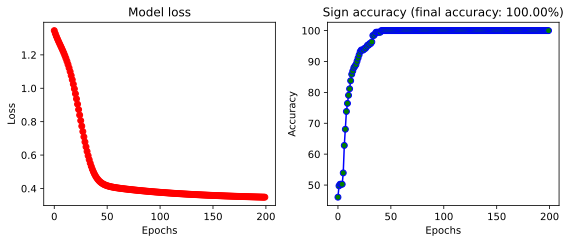

In [29]:
fig,ax = plt.subplots(1,2,figsize=(8,3.5), dpi=135)

ax[0].plot(losses,'ro-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(signaccuracy,'bo-',markerfacecolor='g',)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Sign accuracy (final accuracy: %.2f%%)'%signaccuracy[-1])

plt.tight_layout()
plt.show()

#### Conclusion :
- LSTM needs more iteration and large data to train on.

## 7. Test the trained model 

In [30]:
# Create new data WITH FLIPPED SIGNS!
n_pts = 50
newdata = torch.zeros(n_pts)

for i in range(n_pts):
    newdata[i] = 2*torch.rand(1) * (-1)**(i+1)

In [31]:
yHat = np.zeros(n_pts)
seqlength=9

for timei in range(n_pts-seqlength):

    # grab a snippet of data
    X = newdata[timei:timei+seqlength].view(seqlength,1,1)

    # forward pass and loss
    ypred,hh = net(X)
    
    yHat[timei+seqlength] = ypred[-1]
    

# compute sign-accuracy
truesign = np.sign(newdata.numpy())
predsign = np.sign(yHat)
signaccuracy = 100*np.mean(truesign[seqlength:]==predsign[seqlength:])

### Results Visualization

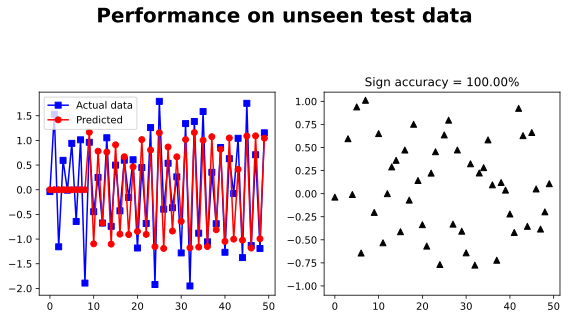

In [32]:
fig,ax = plt.subplots(1,2,figsize=(8,4), dpi=135)

ax[0].plot(newdata,'bs-',label='Actual data')
ax[0].plot(yHat,'ro-',label='Predicted')
#ax[0].set_ylim([-1.1,1.1])
ax[0].legend()

ax[1].plot(newdata-yHat,'k^')
ax[1].set_ylim([-1.1,1.1])
ax[1].set_title('Sign accuracy = %.2f%%' %signaccuracy)

plt.suptitle('Performance on unseen test data',fontweight='bold',fontsize=20, y=1.1)
plt.tight_layout()

plt.show()